# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [3]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
load_dotenv()
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

In [27]:
# Read your api key environment variable
api_key = '3e44deff324b4a0e8900fa283bbbf2b3'
type(api_key)

str

In [28]:
# Create a newsapi client
newsapi=NewsApiClient(api_key=api_key)
type(newsapi)

newsapi.newsapi_client.NewsApiClient

In [46]:
# Fetch the Bitcoin news articles
btc_headlines = newsapi.get_everything(q='Bitcoin',language='en',sort_by='relevancy')


In [33]:
# Fetch the Ethereum news articles
eth_headlines = newsapi.get_everything(q='Ethereum',language='en',sort_by='relevancy')

In [53]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_headlines['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_sentiment.append({
            
            
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
            'Text': text
            
        })
    except AttributeError: 
            pass
btc_sentiment_df = pd.DataFrame(btc_sentiment)
btc_sentiment_df.head()

,Compound,Positive,Negative,Neutral,Text
0,0.3182,0.091,0.000,0.909,Elon Musks cryptocurrency hype was more than j...
1,0.3818,0.071,0.000,0.929,"Tesla, led by Elon Musk, confirmed that it pur..."
2,-0.1027,0.000,0.038,0.962,"For a brief moment on Sunday, before Tesla sai..."
3,0.2500,0.056,0.000,0.944,Twitter and Square CEO Jack Dorsey and rapper ...
4,0.6597,0.137,0.000,0.863,"Today in an SEC filing, Tesla disclosed that i..."


In [54]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_headlines['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_sentiment.append({
            
            
            'Compound': compound,
            'Positive': pos,
            'Negative': neg,
            'Neutral': neu,
            'Text': text
            
        })
    except AttributeError: 
            pass
eth_sentiment_df = pd.DataFrame(eth_sentiment)
eth_sentiment_df.head()

,Compound,Positive,Negative,Neutral,Text
0,-0.3400,0.063,0.119,0.818,Worried that the GeForce RTX 3060 will be sold...
1,0.0000,0.000,0.000,1.000,Coinbase plans to go public by way of a direct...
2,0.0000,0.000,0.000,1.000,FILE PHOTO: Representation of the Ethereum vir...
3,0.0000,0.000,0.000,1.000,By Reuters Staff\r\nFILE PHOTO: Representation...
4,0.0258,0.030,0.000,0.970,While the first Christie's auction of digital ...


In [56]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Positive,Negative,Neutral
count,18.000000,18.000000,18.000000,18.000000
mean,0.199928,0.072111,0.019056,0.908778
std,0.376340,0.086707,0.035630,0.081887
min,-0.503700,0.000000,0.000000,0.647000
25%,0.000000,0.000000,0.000000,0.868750
50%,0.177900,0.053500,0.000000,0.919500
75%,0.411575,0.098500,0.024000,0.957250
max,0.921700,0.353000,0.114000,1.000000


In [57]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Positive,Negative,Neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.189495,0.051300,0.005950,0.942750
std,0.274088,0.054785,0.026609,0.062097
min,-0.340000,0.000000,0.000000,0.818000
25%,0.000000,0.000000,0.000000,0.900000
50%,0.012900,0.046500,0.000000,0.949500
75%,0.365100,0.082000,0.000000,1.000000
max,0.709600,0.144000,0.119000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Bitcoin

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [60]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
import nltk

In [62]:
# Expand the default stopwords list if necessary
nltk.download('stopwords')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /Users/brynlloyd-
[nltk_data]     davies/opt/anaconda3/lib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    sw = set(stopwords.words('english'))
    regex=re.compile("[^a-zA-Z ]")    
    re_clean = regex.sub('', str(text))
    words = word_tokenize(re_clean)
    words = [word for word in words if word not in sw]
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens= [word.lower() for word in lem if word.lower() not in sw ]

    return tokens


In [85]:
# Create a new tokens column for bitcoin
btc_sentiment_df['Tokens'] = btc_sentiment_df['Text'].apply(tokenizer)
btc_sentiment_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,0.3182,0.091,0.000,0.909,Elon Musks cryptocurrency hype was more than j...,"[elon, musks, cryptocurrency, hype, idle, talk..."
1,0.3818,0.071,0.000,0.929,"Tesla, led by Elon Musk, confirmed that it pur...","[tesla, led, elon, musk, confirmed, purchased,..."
2,-0.1027,0.000,0.038,0.962,"For a brief moment on Sunday, before Tesla sai...","[brief, moment, sunday, tesla, said, invested,..."
3,0.2500,0.056,0.000,0.944,Twitter and Square CEO Jack Dorsey and rapper ...,"[twitter, square, ceo, jack, dorsey, rapper, j..."
4,0.6597,0.137,0.000,0.863,"Today in an SEC filing, Tesla disclosed that i...","[today, sec, filing, tesla, disclosed, acquire..."


In [86]:
# Create a new tokens column for ethereum
eth_sentiment_df['Tokens'] = eth_sentiment_df['Text'].apply(tokenizer)
eth_sentiment_df.head()

,Compound,Positive,Negative,Neutral,Text,Tokens
0,-0.3400,0.063,0.119,0.818,Worried that the GeForce RTX 3060 will be sold...,"[worried, geforce, rtx, sold, cryptocurrency, ..."
1,0.0000,0.000,0.000,1.000,Coinbase plans to go public by way of a direct...,"[coinbase, plan, go, public, way, direct, list..."
2,0.0000,0.000,0.000,1.000,FILE PHOTO: Representation of the Ethereum vir...,"[file, photo, representation, ethereum, virtua..."
3,0.0000,0.000,0.000,1.000,By Reuters Staff\r\nFILE PHOTO: Representation...,"[reuters, stafffile, photo, representation, et..."
4,0.0258,0.030,0.000,0.970,While the first Christie's auction of digital ...,"[first, christies, auction, digital, artwork, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [87]:
from collections import Counter
from nltk import ngrams

In [109]:
#define functions for n grams
def get_tokens(df):
    tokens=[]
    for i in df['Tokens']:
        tokens.extend(i)
    return tokens

tokens_btc= get_tokens(btc_sentiment_df)
tokens_eth= get_tokens(eth_sentiment_df)

def bigrams(token, N=2):
    word_count = dict(Counter(ngrams(token, n=N)))
    return word_count

In [110]:
# Generate the Bitcoin N-grams where N=2
btc_ngrams = bigrams(tokens_btc, 2)

In [111]:
# Generate the Ethereum N-grams where N=2
eth_ngrams = bigrams(tokens_eth, 2)

In [112]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [114]:
# Get the top 10 words for Bitcoin
btc_token_count=token_count(tokens_btc, 10)

In [115]:
# Get the top 10 words for Ethereum
eth_token_count=token_count(tokens_eth, 10)

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [117]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

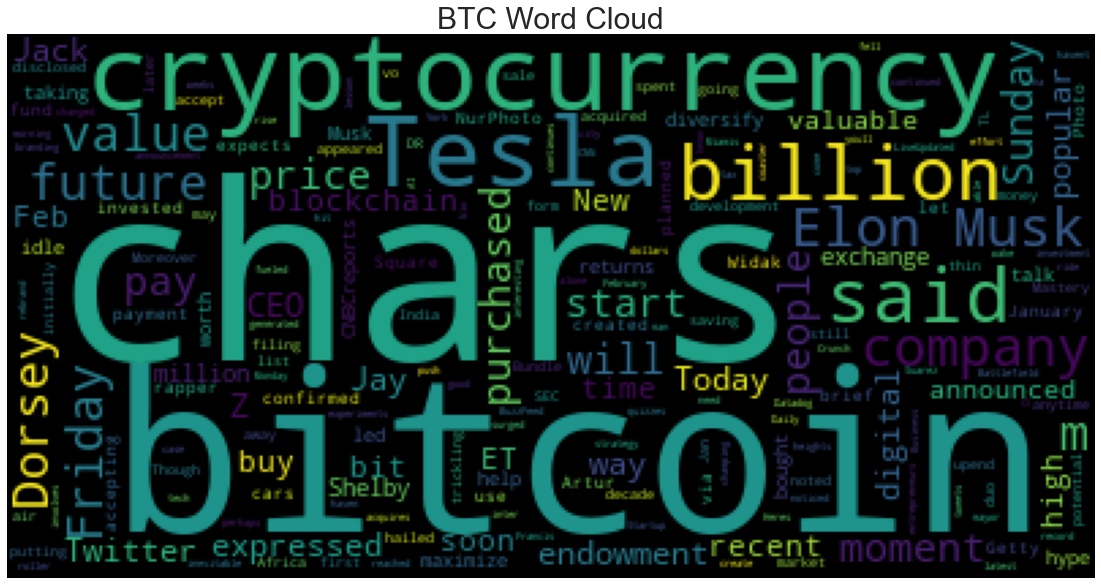

In [122]:
# Generate the Bitcoin word cloud
btc_wc = WordCloud().generate(btc_sentiment_df.Text.str.cat())
btc_wc
plt.axis('off')
plt.title('BTC Word Cloud',fontsize=30)
plt.imshow(btc_wc)

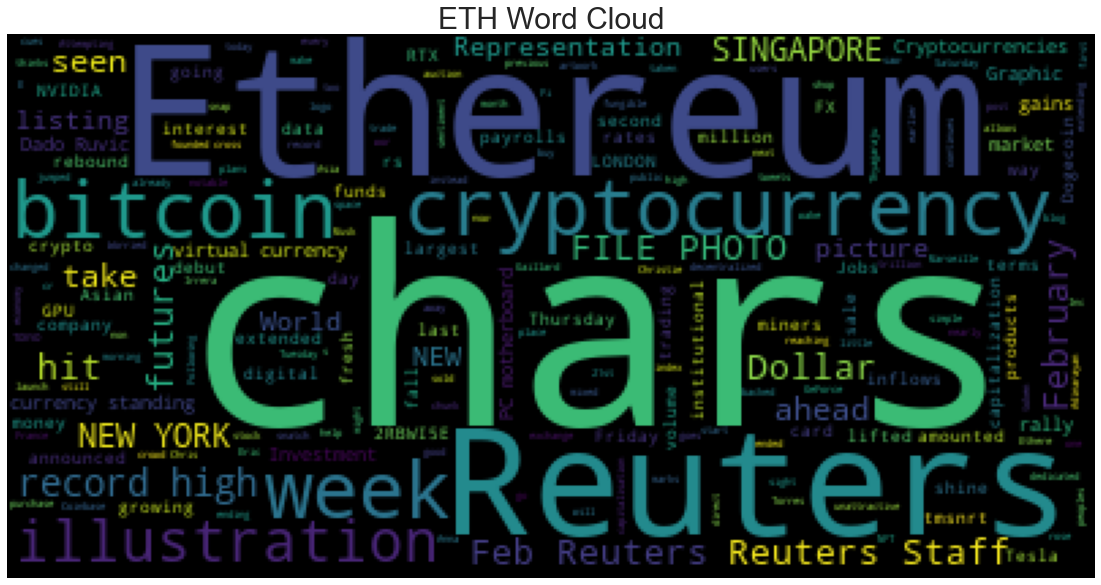

In [123]:
# Generate the Ethereum word cloud
eth_wc = WordCloud().generate(eth_sentiment_df.Text.str.cat())
eth_wc
plt.axis('off')
plt.title('ETH Word Cloud',fontsize=30)
plt.imshow(eth_wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [125]:
import spacy
from spacy import displacy

In [126]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.7 MB 773 kB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [127]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [128]:
# Concatenate all of the bitcoin text together
btc_conc = btc_sentiment_df.Text.str.cat()

In [129]:
# Run the NER processor on all of the text
btc_proc = nlp(btc_conc)
# Add a title to the document
btc_proc.user_data['title']= 'BTC NER'

In [130]:
# Render the visualization
displacy.render(btc_proc, style='ent')

In [132]:
# List all Entities
for i in btc_proc.ents:
    print(i.text,i.label_)

Tesla ORG
$1.5 billion MONEY
Elon Musk PERSON
about $ 1.5 billion MONEY
January DATE
Artur ORG
Widak PRODUCT
NurPhoto ORG
Sunday DATE
Tesla ORG
$1.5 billion MONEY
Jack Dorsey PERSON
Jay Z PERSON
Africa LOC
India GPE
Dorsey ORG
Friday DATE
500 CARDINAL
chars]Today DATE
SEC ORG
Tesla ORG
$1.5 billion MONEY
Bitcoin PERSON
first ORDINAL
more than a decade later DATE
21.11 MONEY
Jan. 28 DATE
70% PERCENT
Bitcoin PERSON
Feb. 9, 2021 DATE
8:01 a.m. TIME
Feb. 9, 2021 DATE
8:01 a.m. TIME
Bitcoin PERSON
Teslas PERSON
Monday DATE
1.5 MONEY
this morning TIME
over $50,000 MONEY
Dorsey PERSON
Jay Z PERSON
Datadog ORG
Startup Battlefield ORG
BuzzFeed ORG
AI ORG
Daily Crunch WORK_OF_ART
February 12, 2021 DATE
Bitcoins PERSON
recent weeks DATE
Friday DATE
Francis Suarez PERSON
Friday DATE
Elon Musk PERSON
Twitter PRODUCT
Musk PERSON
CNN ORG
above $58,000 MONEY
Sunday DATE
just above $46,000 MONEY
Tuesday DATE
handshakes over millions CARDINAL
today DATE
2012 DATE
Alabamas PERSON
Richard Shelby PERSON
ne

---

## Ethereum NER

In [134]:
# Concatenate all of the bitcoin text together
eth_conc = eth_sentiment_df.Text.str.cat()

In [135]:
# Run the NER processor on all of the text
eth_proc = nlp(eth_conc)
# Add a title to the document
eth_proc.user_data['title']= 'ETH NER'

In [136]:
# Render the visualization
displacy.render(eth_proc, style='ent')

In [137]:
# List all Entities
for i in eth_proc.ents:
    print(i.text,i.label_)

GeForce ORG
3060 GPE
GPU ORG
today DATE
2012 DATE
Ethereum ORG
February 3, 2018 DATE
Reuters ORG
Reuters ORG
Ethereum ORG
February 3, 2018 DATE
first ORDINAL
Christie's ORG
NFT ORG
a few days DATE
Chris Torres PERSON
3060 DATE
GPU ORG
next week DATE
Nvidia PERSON
this morning TIME
Reuters ORG
FILE PERSON
Bitcoin PERSON
Marseille GPE
France GPE
February 7, 2021 DATE
Eric Gaillard PERSON
SINGAPORE PERSON
Reuters ORG
Reuters ORG
SINGAPORE GPE
Feb 9 DATE
Reuters ORG
Asia LOC
Tuesday DATE
Tesla Inc ORG
chars]NEW YORK GPE
Reuters ORG
second ORDINAL
Thursday DATE
chars]NEW YORK GPE
Feb 18 DATE
Reuters ORG
second ORDINAL
Thursday DATE
Ethereum ORG
February 3, 2018 DATE
LONDON GPE
7.34% PERCENT
the week ending 21st February DATE
11.65% PERCENT
the previous week DATE
Ethereum ended ORG
the week DATE
1,935.57 MONEY
the week DATE
Friday DATE
Thyagaraju Adinarayan PERSON
Anna Irrera PERSON
Musk PERSON
Dogecoin GPE
Dogecoin GPE
nearly 68% PERCENT
$0.054496
 MONEY
YORK PERSON
Reuters ORG
$245 million